![LogoUC3M](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg/320px-Acr%C3%B3nimo_y_nombre_de_la_UC3M.svg.png)

# Tutorial 1: K-Nearest Neighbors with Scikit-learn

We will install the following library:

+ `statsmodels`: for confidence intervals.


In [1]:
!pip install statsmodels

# Data Structures in Python

- Basic Python: lists, dictionaries, sets, ...
- Numpy: numeric vectors and matrices.
- Pandas: Dataframes (tables)

This is a "basic list" in Python, a collection of items (of any kind).

In [2]:
print('This is a Python list:')
a = [1, 2, 3]
print(a)

This is a Python list:
[1, 2, 3]


These are a Numpy vector and a Numpy matrix. They must hold numeric values.

In [3]:
import numpy as np

print('This is a Numpy vector:')
a = np.array([1, 2, 3])
print(a)

print('\n-----\n')

print('This is a Numpy matrix:')
b = np.array([[1,2,3],
              [4,5,6]])
print(b)

This is a Numpy vector:
[1 2 3]

-----

This is a Numpy matrix:
[[1 2 3]
 [4 5 6]]


This is a Pandas dataframe. It stores a table of data (similar to SQL relations), with different columns, which can have different types (number, strings, categorical values, etc).

In [4]:
import pandas as pd

print('This is a Pandas dataframe:')
df = pd.DataFrame({
    'a': [1,2,3],
    'b': ['a', 'b', 'c']
})
display(df)

This is a Pandas dataframe:


,a,b
0,1,a
1,2,b
2,3,c


Pandas dataframes are a very flexible and appropriate structure for representing data.

Some libraries might only work with Numpy arrays, but there are simple ways to convert a Pandas dataframe to a matrix. To do so, categorical values must be encoded as numbers.

A typical workflow for machine learning can be the following:

1. Load data as a Pandas dataframe
2. Do exploratory data analysis (EDA) to understand your data
3. Encode the Pandas dataframe as a numpy matrix (get rid of categorical values and missing values)
4. Do machine learning

# Scikit-learn

Scikit-learn (`sklearn`) is a Python library that provides a collection of machine learning algorithms and tools.
https://scikit-learn.org/stable/

# Input data in Scikit-learn

Some algorithms require that input data be **numeric** matrices. In such cases, this implies that categorical attributes must be represented as:
+ Integers
+ One-hot encoding / dummy variables.

However, other algorithms will work with Pandas dataframes with categorical values.

Missing values can also be represented as `NaN`.

# The Iris flower dataset

The *Iris flower data set* was introduced by the British statistician and biologist Ronald Fisher in 1936, and has since been widely used as a benchmark for validating classification models.

The dataset contains measurements of *iris* flowers belonging to three different species: *setosa*, *versicolor* and *virginica*.

The following image shows an example of each kind:

![](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

The dataset contains 150 samples (**instances**), 50 for each of the species (**classes**). Besides the class label, each sample contains the following information (**attributes** or **features**):

*   Petal length (cm.)
*   Petal width (cm.)
*   Sepal length (cm.)
*   Sepal width (cm.)

Therefore, the data structure is the following:

![](https://bishwamittra.github.io/images/imli/iris_dataset.png)

The Iris dataset is available directly from Scikit-learn. Otherwise, we could load it from a CSV or Excel file.

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
print("Features of the Iris dataset:")
print(iris.feature_names)

Features of the Iris dataset:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("Class labels of the Iris dataset:")
print(iris.target_names)

Class labels of the Iris dataset:
['setosa' 'versicolor' 'virginica']


We will retrieve the data from the Iris dataset. In many cases, we will adhere to the following convention:

+ `X` is the matrix of attributes (samples as rows, features as columns).
+ `y` is the vector of class labels.

In [8]:
X = iris.data
y = iris.target

We can see that `X` (the input features) is a 2-dimensional Numpy array, and `y` (the response variable) is a Numpy vector.

In [9]:
print(type(X))
print(X.shape) # 150 instances and 4 input features
print(X.dtype) # Values are real numbers (float)

<class 'numpy.ndarray'>
(150, 4)
float64


In [10]:
print(type(y))
print(y.shape) # 150 values of the response variable
print(y.dtype) # Values are integers

<class 'numpy.ndarray'>
(150,)
int64


Let's take a look at the first 10 instances:

In [11]:
X[0:10,0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [12]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Below, we can see the whole table, with the response variable being the last column.
It is not necessary to do this when working with Scikit-learn, it is just for visualization purposes.

In [13]:
np.concatenate((X, y[:,np.newaxis]), axis=1)[0:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

We can plot the Iris flower dataset to see how it looks like:

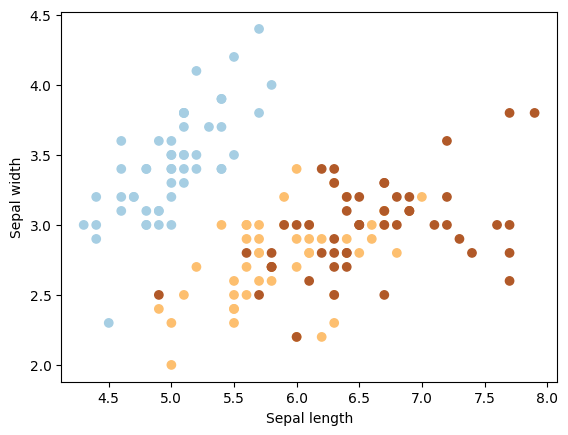

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Training a K-Nearest Neighbors classifier

We will follow the steps to train (fit) a KNN classifier.

In [15]:
from sklearn import neighbors

# Here, we define the type of training method (nothing happens yet)
clf = neighbors.KNeighborsClassifier()

# Now, we train (fit) the method on the (X,y) dataset
clf.fit(X, y)

# clf **has been changed** and now contains the trained model

KNeighborsClassifier()

# Training and evaluating a classifier with a test set

In [16]:
from sklearn.model_selection import train_test_split

We will create the training (X_train, y_train) and testing (X_test, y_test) sets:
- 2/3 for training
- 1/3 for testing

Notice that we set a **random_state** for reproducibility (this is important!)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let's check the shapes of the training and testing partitions:

In [18]:
print(X_train.shape, y_train.shape) # 100 instances for training
print(X_test.shape, y_test.shape)   # 50 instances for testing

(100, 4) (100,)
(50, 4) (50,)


Let's print the five first training instances:

In [19]:
print("Input features:")
print(X_train[:5,:])

print("\n-----\n")

print("Classes:")
print(y_train[:5])

Input features:
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]

-----

Classes:
[1 2 1 0 2]


If we create the partition once again, it will be the same as before if we use the same random state:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Input features:")
print(X_train[:5,:])

Input features:
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]


But it will be different if we change the random seed:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

print("Input features:")
print(X_train[:5,:])

Input features:
[[4.7 3.2 1.3 0.2]
 [4.3 3.  1.1 0.1]
 [5.4 3.9 1.3 0.4]
 [5.5 2.6 4.4 1.2]
 [6.1 2.6 5.6 1.4]]


Let's keep the original partition (with random state=42)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now, we will train the classifier with the `fit` method, only using the training set. We will also use scaling to normalize the data, avoding some features to have more weight than others.

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Here, we create the scaler
scaler = MinMaxScaler()

# Here, we set our model to KNN classifier
clf = KNeighborsClassifier()

# We create a pipeline that first scales the data and then trains the model
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', clf)]
)

# Now, we train it
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

By the way, we can get help of any function (like `fit`)

In [24]:
?clf.fit

Now, we evaluate the model, by computing predictions on the test set. By using the pipeline, the data is automatically scaled before making predictions.

In [25]:
y_pred = pipe.predict(X_test)

We can check the predictions for the testing instances

In [26]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


For the sake of visualization, we can compare predictions and actual values (ground truth of the response variable). We can see that for the first 5 instances, it is always correct.

In [27]:
print(np.hstack((y_pred[:5,np.newaxis], y_test[:5,np.newaxis])))

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]]


But, in order to evaluate the model on the test partition, we can compute a metric (classification accuracy in this case). It looks pretty high (98%).

In [28]:
from sklearn import metrics

accuracy_knn = metrics.accuracy_score(y_test, y_pred)
print(accuracy_knn)

0.98


However, the 0.98 accuracy is the model evaluation (estimation of performance). We still need to compute the final model (the one that will be sent and used by the company) **using all available data**.

In [29]:
# Now, we create the pipeline and create it.
final_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)
final_pipe.fit(X, y)

# final_pipe contains the model that would be used by the company
# Its estimated accuracy is what we computed before (98%)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

By the way, we can store (and load) this model on a file. This is called _model persistence_.

In [30]:
from joblib import dump, load

# Save the final model to a file
dump(final_pipe, 'final_model.joblib')

# Load the model from the file
final_clf_reloaded = load('final_model.joblib')

The whole process is summarized in the following cell:

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we create the classification pipeline
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)

# We train the model
pipe.fit(X_train, y_train)

# We obtain predictions on the test set
y_pred = pipe.predict(X_test)

# We compute accuracy

accuracy_knn = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy_knn} ")

# We finally compute the final model with all available data
final_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)
final_pipe.fit(X, y)

Accuracy of the model: 0.98 


Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

# Exercise
## Fit, predict, evaluate, and build final model using decision trees.

The following class can be used for classification:

```
from sklearn.tree import DecisionTreeClassifier
```

The following class can be used for regression:

```
from sklearn.tree import DecisionTreeRegressor
```

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# @TODO Import model

#


# @TODO Train/test split
# Hint: do we need to do something else?



#


# @TODO Create the decision tree model (no training yet)

#


# Fix the seed for reproducibility
np.random.seed(42)


# @TODO Fit the decision tree model

#


# @TODO Compute predictions in the test set

#


# @ TODO Compute and print accuracy of the decision tree model


#


np.random.seed(42)
# @ TODO Build final model


#

# Training and evaluating a KNN model with cross validation

First, we are going to do cross-validation with a loop, so that we understand the process better.

**However**, it is better to do cross validation with the `cross_val_score` function, as we will do later.

KFold creates the training/test cross validation folds.
- The parameter `shuffle` randomly shuffles the data before splitting the folds. We should always do this, unless we have good reasons otherwise.
- `random_state` makes the shuffling reproducible.

In [33]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Now, we carry out cross validation by going through all 5 folds.

In every iteration:
- We train a model on the training folds
- We compute predictions on the testing folds
- We compute the metric (accuracy) and store it

When the cross validation loop ends, we compute the average and standard deviation.    

In [34]:
# This variable will contain the 5 cross validation accuracies, one per iteration
scores = []

for train_index, test_index in cv.split(X):
    print(f"Train: {train_index[:5]} ...", f"Test: {test_index[:5]} ...")
    # Getting the actual training and testing partitions out of the indices
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    # Training the model for this particular cross validation iteration
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier())]
    )
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)

    print(f"The accuracy for this cross val iteration is: {accuracy_knn}")
    print()

    # We add this accuracy to the list
    scores.append(accuracy_knn)

# Transforming scores from list to numpy array (this is just a technicality)
scores = np.array(scores)
print(f"All the accuracies are: {scores}")
print(f"The average cross validation accuracy is: {scores.mean():.2f} ± {scores.std():.2f}")

Train: [0 1 2 3 4] ... Test: [ 9 12 18 19 26] ...
The accuracy for this cross val iteration is: 1.0

Train: [1 2 3 5 6] ... Test: [ 0  4 10 11 15] ...
The accuracy for this cross val iteration is: 0.9666666666666667

Train: [0 1 2 3 4] ... Test: [ 5  7 23 24 25] ...
The accuracy for this cross val iteration is: 0.9666666666666667

Train: [0 1 4 5 7] ... Test: [ 2  3  6  8 13] ...
The accuracy for this cross val iteration is: 0.9

Train: [0 2 3 4 5] ... Test: [ 1 14 20 21 37] ...
The accuracy for this cross val iteration is: 0.9333333333333333

All the accuracies are: [1.         0.96666667 0.96666667 0.9        0.93333333]
The average cross validation accuracy is: 0.95 ± 0.03


So far, we have programmed the loop explicitly, in order to understand what cross validation does.

However, cross validation is typically done by means of the `cross_val_score` function:

In [35]:
from sklearn.model_selection import cross_val_score, KFold

# Create a k-fold cross validation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)

scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv)

print(f"All the accuracies are: {scores}")
print(f"The average cross validation accuracy is: {scores.mean():.2f} ± {scores.std():.2f}")

All the accuracies are: [1.         0.96666667 0.96666667 0.9        0.93333333]
The average cross validation accuracy is: 0.95 ± 0.03


We have found that 0.95 is the model evaluation (estimation of performance). Still, the final model has to be trained with all available data.

In [36]:
final_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)

# Now, we train it
final_pipe.fit(X, y)

# final_pipe contains the model that would be used by the company
# Its estimated accuracy is what we computed before

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

Below, you have the complete code for cross validation evaluation (and also obtaining the final model at the end):

In [37]:
from sklearn import neighbors
from sklearn.model_selection import KFold, cross_val_score

# Create a k-fold cross validation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)
scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv)

print(f"The average cross validation accuracy is: {scores.mean():.2f} ± {scores.std():.2f}")

final_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())]
)

# Now, we train it
final_pipe.fit(X, y)

# final_pipe contains the model that would be used by the company

The average cross validation accuracy is: 0.95 ± 0.03


Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

# Changing hyperparameters of a KNN model

Take a look at the documentation of the KNN classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Let's see the effect of changing the value of the parameter `p` between `1` and `2`. We use holdout here. It seems that results are exactly the same.

In [39]:
# This loop checks what happens with the two criterions
for p in [1, 2]:
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier(p=p))]
    )
    pipe.fit(X_train,y_train)
    y_test_pred = pipe.predict(X_test)
    accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With {p=}: {accuracy_knn:.2f}")

With p=1: 0.98
With p=2: 0.98


Let's see the effects of `n_neighbors`.

In [40]:
for n_neighbors in [2, 4, 8, 16, 32]:
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))]
    )
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With {n_neighbors=}: {accuracy_knn:.2f}")

With n_neighbors=2: 0.98
With n_neighbors=4: 0.98
With n_neighbors=8: 0.98
With n_neighbors=16: 0.98
With n_neighbors=32: 0.94


It seems that a very large value of `n_neighbors` work worse.

# Exercise
## Check the effect of changing hyperparameters in a KNN classifier.

Take a look at the documentation of the KNN classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Let's test different values for `weights` (`uniform` and `distance`).

In [41]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# @TODO Define loop for possible values of `weights`

#


    # @TODO Create the KNN model (no training yet)
    # Use a pipeline including a scaler and the KNN model
    # Remember to set the desired hyperparameter!

    #


    # @TODO Fit the tree model

    #


    # @TODO Compute predictions in the test set

    #


    # @ TODO Compute and print accuracy of the KNN model


    #

# Dealing with categorical variables

Scikit-learn implementation of classification models **cannot** deal with categorical variables (in most cases).
- They must be converted to dummy variables (one-hot-encoding)
- Most Scikit-learn models cannot deal with missing values either

The typical workflow when working with Scikit-learn is:

1. Load data as a Pandas dataframe

2. Do EDA (Exploratory Data Analysis) to understand your data. And this means:
  - How many instances and attributes there are
  - What type of attributes there are (numerical or categorical). This is done to check whether there are categorical features that should be encoded (as dummies / one-hot-encoding)
  - What attributes have missing values, and how many
  - Whether it is a classification or a regression problem (response variable), and in case of classification, whether the class is imbalanced.
  
3. Encode the Pandas dataframe as a numpy matrix (get rid of categorical values and missing values)

4. Do machine learning!

In [43]:
# This is for uploading tennis.txt from your hard drive into Colab
import pandas as pd
# tennis_df = pd.read_csv("tennis.txt", sep=",")
tennis_df = pd.read_csv("https://raw.githubusercontent.com/emiliomartin84/Machine_Learning_Uc3m/main/Data/tennis.txt", sep=",")

We can check the first instances of sky with head

In [44]:
tennis_df.head()

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


With this dataset is very small, so we can visualize it all:

In [45]:
tennis_df

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [46]:
print('The shape of the data table is:')
print('===============================')
print(tennis_df.shape)
print()

print('The types of the attributes are:')
print('================================')
tennis_df.info()

print()

print('How many missing values per attribute:')
print('======================================')
print(tennis_df.isnull().sum())

print()

print('Fraction of missing values per attribute:')
print('======================================')
print(tennis_df.isnull().mean())


The shape of the data table is:
(14, 5)

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sky          14 non-null     object
 1   Temperature  14 non-null     int64 
 2   Humidity     14 non-null     int64 
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 594.0+ bytes

How many missing values per attribute:
Sky            0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

Fraction of missing values per attribute:
Sky            0.0
Temperature    0.0
Humidity       0.0
Windy          0.0
Play           0.0
dtype: float64


Finally, we check whether the response variable is imbalanced. We can see it is not too imbalanced.

In [47]:
print(tennis_df['Play'].value_counts())

print()

print(tennis_df['Play'].value_counts() / tennis_df['Play'].count())

Play
yes    9
no     5
Name: count, dtype: int64

Play
yes    0.642857
no     0.357143
Name: count, dtype: float64


Now, we are going to encode:
- Our categorical features (Sky and Windy)
- The response variable (the class: Play)

But first, we will separate the data table into inputs (X) and output (y)

In [49]:
X_df = tennis_df.drop('Play', axis=1)

print('X:')
print('==========================================')
print(X_df)

print()

print('y:')
print('=========')
y_df = tennis_df['Play']
print(y_df)

X:
         Sky  Temperature  Humidity  Windy
0      sunny           85        85  False
1      sunny           80        90   True
2   overcast           83        86  False
3      rainy           70        96  False
4      rainy           68        80  False
5      rainy           65        70   True
6   overcast           64        65   True
7      sunny           72        95  False
8      sunny           69        70  False
9      rainy           75        80  False
10     sunny           75        70   True
11  overcast           72        90   True
12  overcast           81        75  False
13     rainy           71        91   True

y:
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object


We will use a `ColumnTransformer`, that allows to process only some particular columns, and leaves the others untouched (pass-through). In this case, we will process only the categorical ones.

The output of this transformation **is a Numpy matrix**.

In [50]:
from pprint import pprint
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Sky', 'Windy']

preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features)
                   ],
                   remainder='passthrough')

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 7 columnos
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second two columns are the dummies for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed (not important, in principle)
print(X)
pprint(list(preprocessor.get_feature_names_out()))

(14, 7)

<class 'numpy.ndarray'>

[[ 0.  0.  1.  1.  0. 85. 85.]
 [ 0.  0.  1.  0.  1. 80. 90.]
 [ 1.  0.  0.  1.  0. 83. 86.]
 [ 0.  1.  0.  1.  0. 70. 96.]
 [ 0.  1.  0.  1.  0. 68. 80.]
 [ 0.  1.  0.  0.  1. 65. 70.]
 [ 1.  0.  0.  0.  1. 64. 65.]
 [ 0.  0.  1.  1.  0. 72. 95.]
 [ 0.  0.  1.  1.  0. 69. 70.]
 [ 0.  1.  0.  1.  0. 75. 80.]
 [ 0.  0.  1.  0.  1. 75. 70.]
 [ 1.  0.  0.  0.  1. 72. 90.]
 [ 1.  0.  0.  1.  0. 81. 75.]
 [ 0.  1.  0.  0.  1. 71. 91.]]
['categorical__Sky_overcast',
 'categorical__Sky_rainy',
 'categorical__Sky_sunny',
 'categorical__Windy_False',
 'categorical__Windy_True',
 'remainder__Temperature',
 'remainder__Humidity']


Sometimes it is time consuming to enumerate all categorical columns. We can use `make_column_selector` / `selector` in order to select the types we need.

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

# numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']

preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(handle_unknown='ignore'), selector(dtype_include=["object","bool"]))
                   ],
                   remainder='passthrough')

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 7 columnos
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second two columns are the dummies for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed (not important, in principle)
print(X)

(14, 7)

<class 'numpy.ndarray'>

[[ 0.  0.  1.  1.  0. 85. 85.]
 [ 0.  0.  1.  0.  1. 80. 90.]
 [ 1.  0.  0.  1.  0. 83. 86.]
 [ 0.  1.  0.  1.  0. 70. 96.]
 [ 0.  1.  0.  1.  0. 68. 80.]
 [ 0.  1.  0.  0.  1. 65. 70.]
 [ 1.  0.  0.  0.  1. 64. 65.]
 [ 0.  0.  1.  1.  0. 72. 95.]
 [ 0.  0.  1.  1.  0. 69. 70.]
 [ 0.  1.  0.  1.  0. 75. 80.]
 [ 0.  0.  1.  0.  1. 75. 70.]
 [ 1.  0.  0.  0.  1. 72. 90.]
 [ 1.  0.  0.  1.  0. 81. 75.]
 [ 0.  1.  0.  0.  1. 71. 91.]]


Optionally, we can encode the class into integers. We do that with `LabelEncoder`.

**This is not required**, as Scikit-learn can use categorical classes.

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_df)

y = le.transform(y_df)
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Finally, we just copy the code for evaluating KNN models, and for constructing the final model.
We apply that to our (X,y)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to KNN
clf = neighbors.KNeighborsClassifier()

# We train it
clf.fit(X_train, y_train)

# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)

# We compute accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the model: {accuracy_knn} ")

# We finally compute the final model with all available data
final_clf = neighbors.KNeighborsClassifier()
final_clf.fit(X, y)

Accuracy of the model: 0.6 


KNeighborsClassifier()

Given that this is a 2-class classification problem, we can construct a confidence interval for the accuracy.

We can see it is very inaccurate...

In [54]:
from statsmodels.stats.proportion import proportion_confint
print(f"Only {len(y_test)} instances on the testing partition")
print(f"Model accuracy: {accuracy_knn} ")
proportion_confint(len(y_test) * accuracy_knn, len(y_test), method="wilson")

Only 5 instances on the testing partition
Model accuracy: 0.6 


(0.2307242812760129, 0.8823792257673522)

# KNN regression with holdout evaluation

Let's load the California housing dataset and check its description. Its data about housing prices depending on the characteristics of the zone.

In [55]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [56]:
X = housing.data
y = housing.target
print(X.shape, y.shape)

(20640, 8) (20640,)


The main change is that we use a `KNeighborRegressor` and the metric is now RMSE.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to KNN regressor
regr = neighbors.KNeighborsRegressor()

# We train it
regr.fit(X_train, y_train)

# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)

# We compute accuracy
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the model: {rmse_knn}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

RMSE of the model: 1.076761102039076


Is it better than a trivial regressor?

In [58]:
from sklearn.dummy import DummyRegressor
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train, y_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_test)))

print(f"RMSE of the KNN model: {rmse_knn}")
print(f"RMSE of dummy (mean): {rmse_mean}")
print(f"RMSE ratio KNN/dummy(mean): {rmse_knn/rmse_mean}")

RMSE of the KNN model: 1.076761102039076
RMSE of dummy (mean): 1.15439409553007
RMSE ratio KNN/dummy(mean): 0.9327500081717355


What about MAE?

In [59]:
mae_knn = metrics.mean_absolute_error(y_test, y_test_pred)

from sklearn.dummy import DummyRegressor
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train, y_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_test))

print(f"MAE of the KNN model: {mae_knn}")
print(f"MAE of dummy (median): {mae_median}")
print(f"MAE ratio KNN/dummy(median): {mae_knn/mae_median}")

MAE of the KNN model: 0.8297297099236641
MAE of dummy (median): 0.8865130930710511
MAE ratio KNN/dummy(median): 0.9359474963300559


The following code contains a complete example on how we can train KNN models for regression:

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# We instantiate the model
regr = neighbors.KNeighborsRegressor()

# We train it
regr.fit(X_train, y_train)

# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)

# We compute accuracy
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print(f"RMSE of the KNN model: {rmse_knn}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

RMSE of the KNN model: 1.076761102039076
